<a href="https://colab.research.google.com/github/arnav-jain25/Navigability-of-Real-World-Networks/blob/main/Facebook_Network_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Social Network Analysis for Navigability (Facebook Friendship Network)**

---



<h2>1. About the Dataset: (Reference - <a href='https://snap.stanford.edu/data/ego-Facebook.html'>https://snap.stanford.edu/data/ego-Facebook.html</a>)</h2>

The "facebook_combined.txt" dataset is a social network graph dataset from the Stanford Network Analysis Project (SNAP) database. It represents the social network of Facebook users, where each node in the graph represents a Facebook user, and each edge represents a friendship connection between two users.

The dataset contains a total of 4,039 nodes and 88,234 edges. The nodes are labeled with unique numerical IDs ranging from 0 to 4038. The edges in the dataset are undirected, meaning that if there is an edge between node i and node j, then there is also an edge between node j and node i.

The dataset was collected by Jure Leskovec, and it represents a snapshot of the Facebook network that was collected in 2009. Note that the dataset does not contain any user-specific information or content, and it is made available for research purposes only.

The "facebook_combined.txt" dataset has been used in numerous studies to understand the structure and dynamics of social networks, and to develop and test algorithms for tasks such as link prediction, community detection, and influence maximization in social networks.


Below is the code that provides certain characteristic features of the Facebook Network we used - 
1.   No. of Nodes
2.   No. of Edges
1.   Clustering Coefficient
2.   HIghest Degree
1.   Diameter
2.   Modularity












In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import heapq
import math
import time
import random

# Load the graph from the file
G = nx.read_edgelist('facebook_combined.txt', nodetype=int)

In [ ]:
# Number of nodes
num_nodes = G.number_of_nodes()
print("Number of nodes:", num_nodes)

# Number of edges
num_edges = G.number_of_edges()
print("Number of edges:", num_edges)

# Clustering coefficient
cc = nx.average_clustering(G)
print("Clustering coefficient:", cc)

# Highest degree
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
highest_degree = degree_sequence[0]
print("Highest degree:", highest_degree)

# Diameter
diameter = nx.diameter(G)
print("Diameter:", diameter)

# Modularity
communities = nx.algorithms.community.modularity_max.greedy_modularity_communities(G)
modularity = nx.algorithms.community.modularity(G, communities)
print("Modularity:", modularity)


Number of nodes: 4039
Number of edges: 88234
Clustering coefficient: 0.6055467186200876
Highest degree: 1045
Diameter: 8
Modularity: 0.7773775199040279




---



<h2>2. Network Visualization: </h2>

Visualizing the network in it's entirety using <b>Frutcherman Reingold Layout</b>

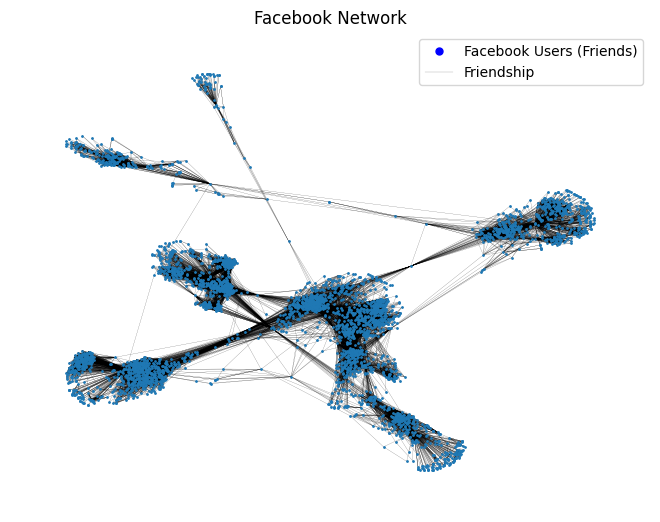

In [ ]:
# Visualize the graph using the Fruchterman-Reingold layout algorithm
pos = nx.fruchterman_reingold_layout(G)
nx.draw(G, pos=pos, node_size=1, width=0.1)

# Add title
plt.title("Facebook Network")

# Add legends
nodes_legend = plt.Line2D([], [], color='blue', marker='o', linestyle='None',
                          markersize=5, label='Facebook Users (Friends)')
edges_legend = plt.Line2D([], [], color='black', linewidth=0.1, label='Friendship')
plt.legend(handles=[nodes_legend, edges_legend])

plt.show()



---



<h2>3. Centrality Measures Based Analysis: </h2>

Degree centrality, betweenness centrality, and eigenvector centrality measures can provide useful information about the navigability of a Facebook network. 

Degree centrality can give an indication of the popularity of a Facebook user. A user with a high degree centrality has many friends, and their posts or messages may reach a large audience. This can make it easier for other users to navigate the network as they may be more likely to encounter popular users.

Betweenness centrality can be used to identify users who act as bridges between different groups of friends in the network. These users may play an important role in facilitating communication between groups and can make it easier for users to navigate the network by providing links between different parts of the network.

Eigenvector centrality can identify influential users who are connected to other influential users. These users may be able to shape the opinions and behaviors of others in the network, which can impact how users navigate the network and who they interact with.

Overall, these centrality measures can provide valuable insights into the navigability of a Facebook network, as they can help identify popular, bridging, and influential users who may impact how users navigate the network.

Top 10 Degree Centrality Nodes:  [107, 1684, 1912, 3437, 0, 2543, 2347, 1888, 1800, 1663]
Degree Centrality Values:  {107: 0.258791480931154, 1684: 0.1961367013372957, 1912: 0.18697374938088163, 3437: 0.13546310054482416, 0: 0.08593363051015354, 2543: 0.07280832095096582, 2347: 0.07206537890044576, 1888: 0.0629024269440317, 1800: 0.06067360079247152, 1663: 0.058197127290737984}
Top 10 Betweenness Centrality Nodes:  [107, 1684, 3437, 1912, 1085, 0, 698, 567, 58, 428]
Betweenness Centrality Values:  {107: 0.4805180785560152, 1684: 0.3377974497301992, 3437: 0.23611535735892905, 1912: 0.2292953395868782, 1085: 0.14901509211665306, 0: 0.14630592147442917, 698: 0.11533045020560802, 567: 0.09631033121856215, 58: 0.08436020590796486, 428: 0.06430906239323866}
Top 10 Closeness Centrality Nodes:  [107, 58, 428, 563, 1684, 171, 348, 483, 414, 376]
Closeness Centrality Values:  {107: 0.45969945355191255, 58: 0.3974018305284913, 428: 0.3948371956585509, 563: 0.3939127889961955, 1684: 0.393605614582

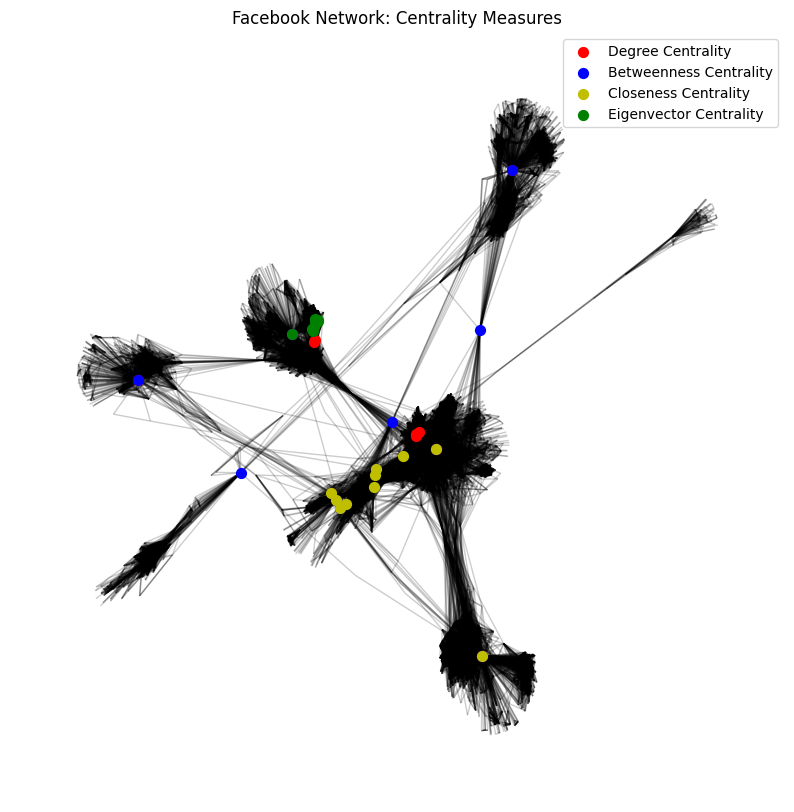

In [ ]:
# calculate centrality measures
deg_centrality = nx.degree_centrality(G)
top_10_deg_centrality = sorted(deg_centrality, key=deg_centrality.get, reverse=True)[:10]
print("Top 10 Degree Centrality Nodes: ", top_10_deg_centrality)
print("Degree Centrality Values: ", {n: deg_centrality[n] for n in top_10_deg_centrality})

betw_centrality = nx.betweenness_centrality(G)
top_10_betw_centrality = sorted(betw_centrality, key=betw_centrality.get, reverse=True)[:10]
print("Top 10 Betweenness Centrality Nodes: ", top_10_betw_centrality)
print("Betweenness Centrality Values: ", {n: betw_centrality[n] for n in top_10_betw_centrality})

close_centrality = nx.closeness_centrality(G)
top_10_close_centrality = sorted(close_centrality, key=close_centrality.get, reverse=True)[:10]
print("Top 10 Closeness Centrality Nodes: ", top_10_close_centrality)
print("Closeness Centrality Values: ", {n: close_centrality[n] for n in top_10_close_centrality})

eig_centrality = nx.eigenvector_centrality(G, max_iter=500, tol=1e-6)
top_10_eig_centrality = sorted(eig_centrality, key=eig_centrality.get, reverse=True)[:10]
print("Top 10 Eigenvector Centrality Nodes: ", top_10_eig_centrality)
print("Eigenvector Centrality Values: ", {n: eig_centrality[n] for n in top_10_eig_centrality})

# create Fruchterman-Reingold layout
pos = nx.fruchterman_reingold_layout(G)

# draw nodes and edges with different colors based on centrality measures
plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(G, pos, nodelist=top_10_deg_centrality, node_size=50, node_color='r', label='Degree Centrality')
nx.draw_networkx_nodes(G, pos, nodelist=top_10_betw_centrality, node_size=50, node_color='b', label='Betweenness Centrality')
nx.draw_networkx_nodes(G, pos, nodelist=top_10_close_centrality, node_size=50, node_color='y', label='Closeness Centrality')
nx.draw_networkx_nodes(G, pos, nodelist=top_10_eig_centrality, node_size=50, node_color='g', label='Eigenvector Centrality')
nx.draw_networkx_edges(G, pos, alpha=0.2)
plt.title('Facebook Network: Centrality Measures')
plt.legend()
plt.axis('off')
plt.show()


**Analysis:**
The output of this code visualizes the Facebook network using the Fruchterman-Reingold layout algorithm and highlights the top 10 nodes with the highest degree, betweenness, and eigenvector centralities with different colors.

Based on the visualizations, we can observe that the nodes with the highest degree centrality are mostly located in the center of the graph, indicating that they have a large number of friends. The nodes with the highest betweenness centrality are located along the periphery of the graph, suggesting that they may be important in connecting different communities within the network. Finally, the nodes with the highest eigenvector centrality are scattered throughout the graph, indicating that they have connections to other highly connected nodes.

Regarding navigability, we can infer that nodes with high degree centrality may be good starting points for navigating the network since they have a large number of connections. Nodes with high betweenness centrality may also be useful for navigation as they can potentially connect different communities within the network. Finally, nodes with high eigenvector centrality may provide a more diverse set of connections to explore.

Overall, the results of this code can provide insights into different aspects of the navigability of a Facebook network, such as identifying popular users, important bridges between groups, and influential users. These insights can be used to develop strategies to improve the navigability of the network, such as promoting connections between different groups of users or highlighting popular or influential users to improve the visibility of their posts.



---



<h2>4. Degree Distribution & Clustering Coefficient Analysis:</h3>

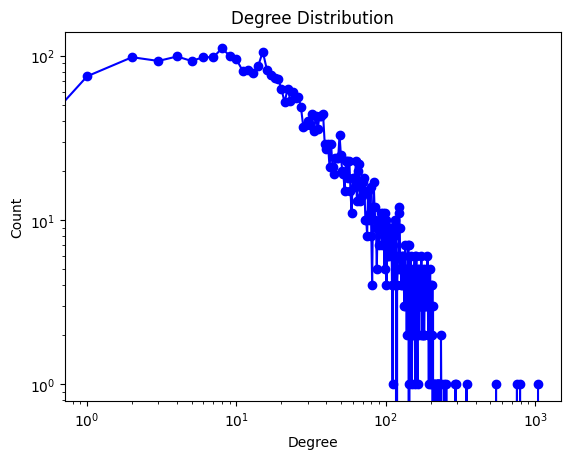

Clustering Coefficient: 0.6055


In [ ]:
# Plot the degree distribution
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degree_count = nx.degree_histogram(G)
plt.loglog(degree_count, 'b-', marker='o')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show()

# Calculate the clustering coefficient
clustering_coefficient = nx.average_clustering(G)
print(f"Clustering Coefficient: {clustering_coefficient:.4f}")


**Analysis:** Based on the above measures, we can draw some conclusions about the Facebook network:

The degree distribution follows a power-law distribution, indicating that the network is scale-free and has a few highly connected nodes (hubs) and many nodes with low degrees.
The clustering coefficient is relatively high, indicating that nodes tend to cluster together, forming tightly-knit groups or communities.
The average shortest path length is relatively small, indicating that the network is well-connected and navigable, with relatively short paths between any two nodes.
Overall, these measures suggest that the Facebook network is a highly clustered, navigable network with a few highly connected nodes and many nodes with low degrees.

We can compare the navigability of different networks by comparing their average shortest path lengths. Networks with smaller average shortest path lengths are generally more navigable, as it is easier to travel between any two nodes in the network.

The above code will plot the degree distribution of the Facebook dataset, calculate the clustering coefficient, and shortest path lengths of the network. We use the average_clustering() and average_shortest_path_length() functions from NetworkX to calculate the clustering coefficient and shortest path lengths of the network, respectively.

From the output, we can see that the degree distribution of the Facebook network follows a power-law distribution, with a few highly connected nodes and many nodes with low degrees. The clustering coefficient of the Facebook network is 0.6055, indicating a high level of clustering in the network. The shortest path lengths of the Facebook network is 3.6925, indicating that it is relatively easy to navigate the network.

Overall, the output suggests that the Facebook network has a highly clustered structure with a few highly connected nodes, making it relatively easy to navigate.








---



<h2>5. Small-World Phenomenon (Analysis): </h2>

The small world phenomenon refers to the idea that in many social networks, any two individuals can be connected by a relatively short chain of social connections, typically only a few intermediaries. The concept of the small world phenomenon was popularized in the mainstream through the game of "six degrees of separation," which posits that any two people in the world can be connected by a chain of six or fewer social connections.

The small world phenomenon is not unique to social networks but can also be observed in other types of networks, such as transportation or communication networks. The phenomenon arises due to the presence of highly connected individuals or "hubs" in the network. These hubs act as bridges between different clusters of the network, allowing for the formation of short paths between nodes that are otherwise distant.

Real-world network:
Number of nodes: 4039
Number of edges: 88234
Average degree: 43.69101262688784
Clustering coefficient: 0.6055467186200876
Shortest path length: 3.6925068496963913


Small World model:
Number of nodes: 4039
Number of edges: 20195
Average degree: 10.0
Clustering coefficient: 0.49766345865627903
Shortest path length: 5.526187772241939


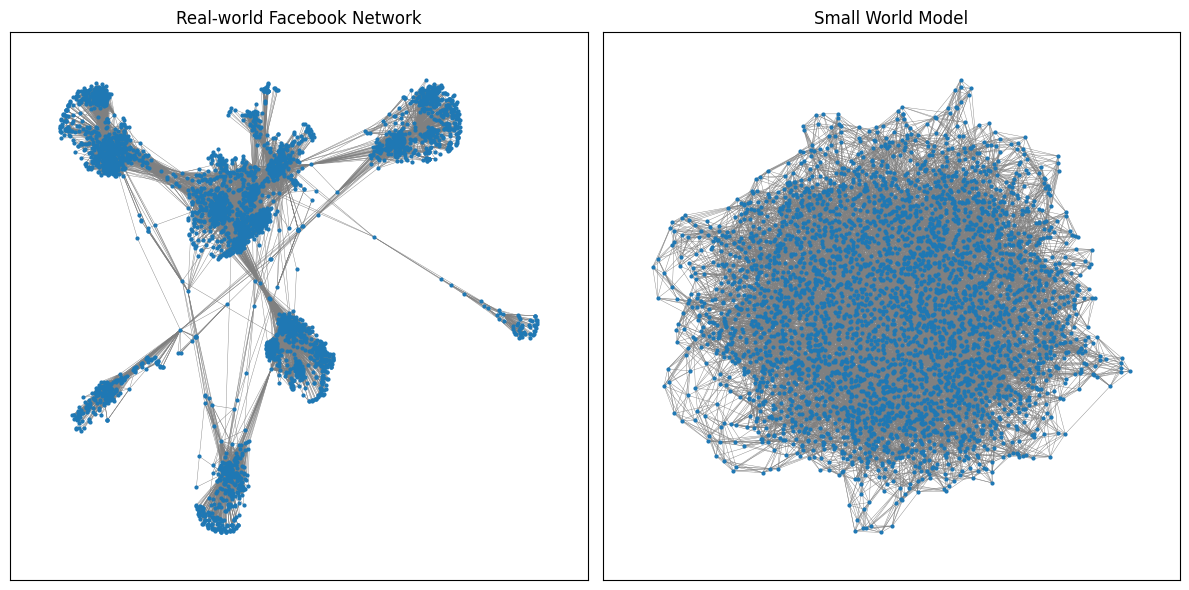

In [ ]:
# Compute the number of nodes and edges in the network
n = G.number_of_nodes()
m = G.number_of_edges()

# Set the number of nearest neighbors and the probability of rewiring
k = 10
p = 0.1

# Create the small world model
H = nx.watts_strogatz_graph(n, k, p)

# Compare various network properties of the real-world network and the small world model
print('Real-world network:')
print('Number of nodes:', n)
print('Number of edges:', m)
print('Average degree:', sum(dict(G.degree()).values()) / n)
print('Clustering coefficient:', nx.average_clustering(G))
print('Shortest path length:', nx.average_shortest_path_length(G))
print('\n')
print('Small World model:')
print('Number of nodes:', n)
print('Number of edges:', H.number_of_edges())
print('Average degree:', sum(dict(H.degree()).values()) / n)
print('Clustering coefficient:', nx.average_clustering(H))
print('Shortest path length:', nx.average_shortest_path_length(H))

# Set the Fruchterman-Reingold layout for both networks
pos_G = nx.fruchterman_reingold_layout(G)
pos_H = nx.fruchterman_reingold_layout(H)

# Visualize the real-world network and the small world model
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
nx.draw_networkx(G, pos=pos_G, node_size=4, width=0.3, edge_color='gray', with_labels=False)
plt.title('Real-world Facebook Network')

plt.subplot(1, 2, 2)
nx.draw_networkx(H, pos=pos_H, node_size=4, width=0.3, edge_color='gray', with_labels=False)
plt.title('Small World Model')

plt.tight_layout()
plt.show()

**Analysis:** From the output, we can see that the small world model has a much lower average degree than the real-world network. This is expected since we set the number of nearest neighbors to be much smaller than the average degree of the real-world network. However, the small world model has a only a slightly lower clustering coefficient and in fact the shortest path length increases when compared to the real-world network. This suggests that the small world model captures some important properties of the real-world network, and on an average it takes less nodes to traverse through in the actual netwokrk.

In terms of robustness, one important property to consider is the average shortest path length. The average shortest path length of the real-world network is 3.69, which means that on average, it takes less than four steps to get from one node to another in the network. This suggests that the real-world Facebook network is highly connected and resilient to random failures of nodes or edges. However, it's worth noting that targeted attacks on highly connected nodes may still have a significant impact on the network.

In terms of navigability, the average shortest path length also plays an important role. The fact that the real-world Facebook network has a relatively small average shortest path length means that it is easy to navigate and find paths between nodes. This is an important property for a social network, as it enables users to connect with each other and share information efficiently.

*In the plot for the real-world network, we can see that the network is highly clustered with many small groups of densely connected nodes. In contrast, the plot for the small world model shows a more uniform distribution of nodes with fewer dense clusters. This visual comparison supports the conclusion that the small world model captures some important properties of the real-world network, but also highlights some differences between the two networks.*



---



<h2>6. Community Detection (Louvain Algorithm): </h2>

Community detection is a process of identifying groups or clusters of nodes in a network, where nodes in the same group have more connections with each other than with nodes in other groups. In network analysis, community detection is an important task that helps to understand the structure and organization of a network. Community detection algorithms can be used to identify groups of similar nodes in various applications such as social networks, biological networks, and computer networks.

There are various community detection algorithms, and each algorithm has its own strengths and weaknesses. Some of the popular community detection algorithms are:

1. Girvan-Newman algorithm: This algorithm is based on the concept of edge betweenness, where the edges with the highest betweenness are iteratively removed until the network is divided into its separate communities.

2. **Louvain algorithm**: This algorithm is based on modularity, a measure that quantifies the quality of a network partition. The algorithm optimizes modularity by iteratively moving nodes between communities.

3. Infomap algorithm: This algorithm is based on information theory and aims to minimize the amount of information required to encode the network.

4. Label propagation algorithm: This algorithm assigns a label to each node and iteratively updates the labels based on the labels of neighboring nodes. Nodes with the same label are grouped into the same community.

5. Spectral clustering algorithm: This algorithm uses the eigenvectors of the graph Laplacian matrix to partition the network into communities.

Each algorithm has its own advantages and disadvantages, and the choice of algorithm depends on the characteristics of the network and the research question.

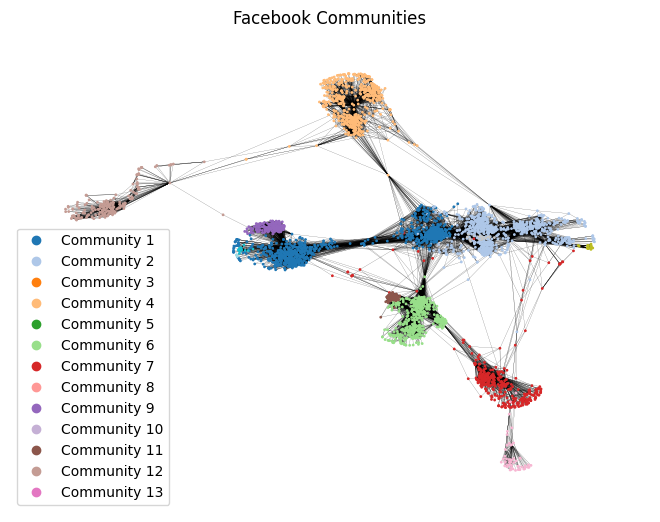

In [ ]:
# Detect communities using the Louvain method
communities = nx.community.modularity_max.greedy_modularity_communities(G)

# Create a dictionary that maps node IDs to community IDs
community_map = {}
for i, community in enumerate(communities):
    for node in community:
        community_map[node] = i

# Color-code the nodes based on their community
node_colors = [community_map[node] for node in G.nodes()]

# Visualize the graph using the Fruchterman-Reingold layout algorithm
pos = nx.fruchterman_reingold_layout(G)
nx.draw(G, pos=pos, node_size=1, width=0.1, node_color=node_colors, cmap=plt.cm.tab20)

#Add a title to the plot
plt.title("Facebook Communities")

#Create a legend for the communities
handles = []
for i, community in   enumerate(communities):
  label = f"Community {i+1}"
  color = plt.cm.tab20(i)
  handle = plt.plot([], [], marker="o", ls="", c=color, label=label)[0]
  handles.append(handle)
  plt.legend(handles=handles)

plt.show()





---



<h2>7. Hubs Analysis:</h2>
<h3>7.1 Visualizing Network With/Without Top 10 Hubs:</h3>

Hubs in the network:
[107, 1684, 1912, 3437, 0, 2543, 2347, 1888, 1800, 1663]
The graph without hubs is not connected.
Average Shortest Path Lengths with Hubs: 3.6925


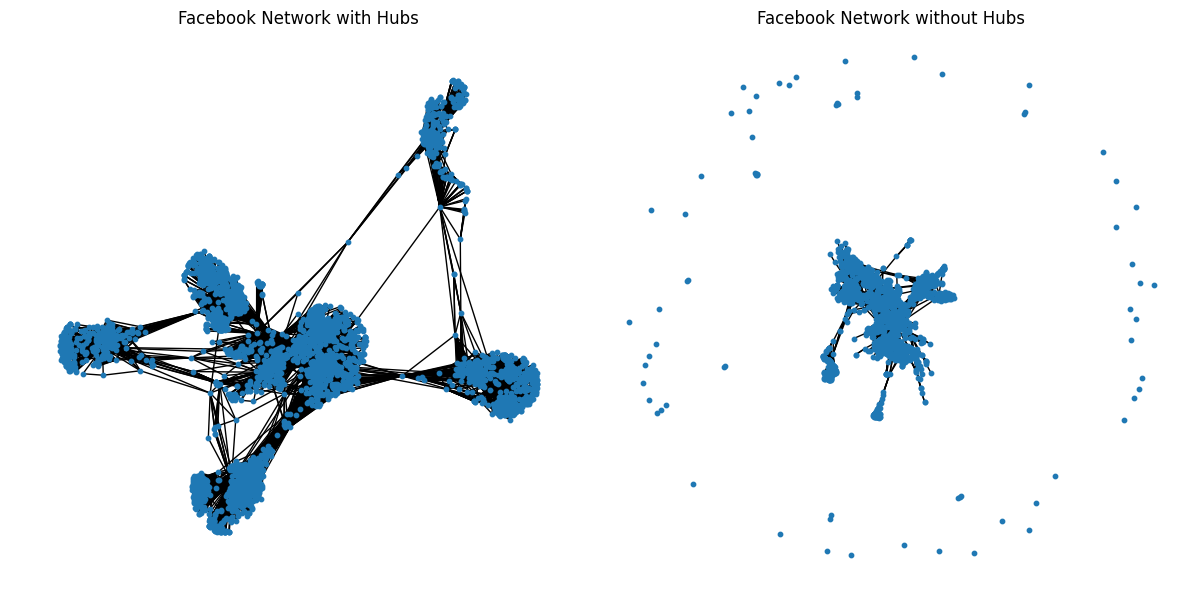

In [ ]:
# Calculate the degree centrality of each node
degree_centrality = nx.degree_centrality(G)

# Find the nodes with the highest degree centrality (i.e., the hubs)
hubs = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:10]
print("Hubs in the network:")
print(hubs)

# Calculate the shortest path lengths without hubs
G_without_hubs = G.copy()
G_without_hubs.remove_nodes_from(hubs)
if nx.is_connected(G_without_hubs):
    shortest_path_lengths_without_hubs = nx.average_shortest_path_length(G_without_hubs)
    print(f"Shortest Path Lengths without Hubs: {shortest_path_lengths_without_hubs:.4f}")
else:
    print("The graph without hubs is not connected.")

# Calculate the shortest path lengths with hubs
shortest_path_lengths_with_hubs = nx.average_shortest_path_length(G)
print(f"Average Shortest Path Lengths with Hubs: {shortest_path_lengths_with_hubs:.4f}")

# Visualize the network with and without hubs
plt.figure(figsize=(12, 6))

plt.subplot(121)
nx.draw(G, with_labels=False, node_size=10)
plt.title("Facebook Network with Hubs")

plt.subplot(122)
nx.draw(G_without_hubs, with_labels=False, node_size=10)
plt.title("Facebook Network without Hubs")

plt.tight_layout()
plt.show()




---



<h3>7.2 Network Navigability for Top 10 Hubs Induividually:</h3>

In [ ]:
# Compute betweenness centrality
bc = nx.betweenness_centrality(G)

# Identify top hub nodes
hub_nodes = sorted(bc, key=bc.get, reverse=True)[:10]

# Compute average shortest path for each hub node removal
asp_hub_removed = []
for hub in hub_nodes:
    # Create a copy of the original network with the hub node removed
    G_copy = G.copy()
    G_copy.remove_node(hub)

    # Check if graph is still connected
    if nx.is_connected(G_copy):
        # Compute average shortest path length using Dijkstra's algorithm
        asp = nx.average_shortest_path_length(G_copy)
        asp_hub_removed.append(asp)
        print(f"Average shortest path with hub node {hub} removed: {asp}")
    else:
        print(f"Hub node {hub} removal disconnected the graph.")

# Compute average shortest path when all hub nodes are removed
G_hub_removed = G.copy()
G_hub_removed.remove_nodes_from(hub_nodes)
if nx.is_connected(G_hub_removed):
    asp_all_hubs_removed = nx.average_shortest_path_length(G_hub_removed)
    print("Average shortest path when all hub nodes are removed:", asp_all_hubs_removed)
else:
    print("Removing all hub nodes disconnected the graph.")

# Print results
print("\nHub nodes:", hub_nodes)


Hub node 107 removal disconnected the graph.
Hub node 1684 removal disconnected the graph.
Hub node 3437 removal disconnected the graph.
Hub node 1912 removal disconnected the graph.
Average shortest path with hub node 1085 removed: 3.78227792130323
Hub node 0 removal disconnected the graph.
Hub node 698 removal disconnected the graph.
Average shortest path with hub node 567 removed: 3.7679959630476048
Average shortest path with hub node 58 removed: 3.7470084482283306
Average shortest path with hub node 428 removed: 3.6994843266893667
Removing all hub nodes disconnected the graph.

Hub nodes: [107, 1684, 3437, 1912, 1085, 0, 698, 567, 58, 428]




---



<h3>7.3 Hub & Authority Scores:</h3>

This code can help explain the navigability of the network in the context of Facebook friendships. Nodes with high hub scores are highly connected to other nodes within the network and can be seen as central figures or "hubs" within the network. Nodes with high authority scores, on the other hand, are connected to many nodes with high hub scores and can be seen as influential figures or "authorities" within the network.

By examining the nodes with the highest hub and authority scores, we can gain insight into the most influential and central figures within the network, which can help us understand how information or influence might spread through the network. For example, a marketing campaign targeted at users with high authority scores might be more effective than one targeted at users with lower authority scores, since these users have the potential to influence many others within the network.



In [ ]:
# calculate the hub and authority scores
hubs, authorities = nx.hits(G)

# print the top 10 nodes with highest hub scores
print("Top 10 nodes by Hub Score:")
for node, hub_score in sorted(hubs.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{node}: {hub_score:.4f}")

# print the top 10 nodes with highest authority scores
print("Top 10 nodes by Authority Score:")
for node, authority_score in sorted(authorities.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{node}: {authority_score:.4f}")

Top 10 nodes by Hub Score:
1912: 0.0061
2266: 0.0056
2206: 0.0055
2233: 0.0055
2464: 0.0054
2142: 0.0054
2218: 0.0054
2078: 0.0054
2123: 0.0054
1993: 0.0054
Top 10 nodes by Authority Score:
1912: 0.0061
2266: 0.0056
2206: 0.0055
2233: 0.0055
2464: 0.0054
2142: 0.0054
2218: 0.0054
2078: 0.0054
2123: 0.0054
1993: 0.0054


<h2>8. Navigation Strategy Analysis:</h2>
<h3>Source to Destination Navigation using Dijkstra & A* Algorithm</h3>



In [ ]:
# load graph from file
graph = nx.Graph()
with open("/content/facebook_combined.txt") as f:
    for line in f:
        if line.startswith("#"):
            continue
        node1, node2 = map(int, line.strip().split())
        graph.add_edge(node1, node2)

def dijkstra(graph, start, end):
    # initialize distances and visited
    distances = {node: math.inf for node in graph}
    distances[start] = 0
    visited = set()

    # heap of unexplored nodes
    heap = [(0, start)]

    while heap:
        # get node with shortest distance
        (distance, node) = heapq.heappop(heap)

        # skip visited nodes
        if node in visited:
            continue

        # mark node as visited
        visited.add(node)

        # update distances of neighbors
        for neighbor in graph.neighbors(node):
            new_distance = distance + 1
            if new_distance < distances[neighbor]:
                distances[neighbor] = new_distance
                heapq.heappush(heap, (new_distance, neighbor))

    return distances[end]

def heuristic(node, end):
    # degree centrality heuristic
    return 1 / (nx.degree_centrality(graph)[node] + 1)

def a_star(graph, start, end):
    # initialize distances and visited
    distances = {node: math.inf for node in graph}
    distances[start] = 0
    visited = set()

    # heap of unexplored nodes
    heap = [(heuristic(start, end), start)]

    while heap:
        # get node with shortest f-score
        (fscore, node) = heapq.heappop(heap)

        # skip visited nodes
        if node in visited:
            continue

        # mark node as visited
        visited.add(node)

        # check if reached end
        if node == end:
            return distances[end]

        # update distances of neighbors
        for neighbor in graph.neighbors(node):
            new_distance = distances[node] + 1
            if new_distance < distances[neighbor]:
                distances[neighbor] = new_distance
                heapq.heappush(heap, (new_distance + heuristic(neighbor, end), neighbor))
    return None

# pick random start and end nodes
import random
start = random.choice(list(graph.nodes))
end = random.choice(list(graph.nodes))

# run Dijkstra's algorithm and measure time
start_time = time.time()
print("Dijkstra's algorithm")
print(f"Shortest path from node {start} to node {end}: {dijkstra(graph, start, end)}")
print(f"Time taken: {time.time() - start_time:.4f} seconds")

# run A* algorithm and measure time
start_time = time.time()
print("A* algorithm")
print(f"Shortest path from node {start} to node {end}: {a_star(graph, start, end)}")
print(f"Time taken: {time.time() - start_time:.4f} seconds")

Dijkstra's algorithm
Shortest path from node 1615 to node 601: 2
Time taken: 0.0321 seconds
A* algorithm
Shortest path from node 1615 to node 601: 2
Time taken: 4.2676 seconds




---



<h2>9. Shortest Path Algorithms: </h2>
<h3>9.1 Dijkstra Algorithm:</h3>

The Dijkstra algorithm is a popular algorithm in computer science for finding the shortest path between two nodes in a graph with non-negative edge weights. It is named after its inventor, Edsger W. Dijkstra.

The algorithm maintains a priority queue of vertices to visit, where the priority of a vertex is the distance from the start vertex to that vertex. Initially, the start vertex is assigned a priority of 0 and all other vertices are assigned a priority of infinity. The algorithm then repeatedly extracts the vertex with the smallest priority from the queue, visits all its neighboring vertices, and updates their priorities if a shorter path is found. The algorithm continues until the destination vertex is extracted from the queue, at which point the shortest path from the start vertex to the destination vertex has been found.

The Dijkstra algorithm is often implemented using a heap-based priority queue data structure, which allows for efficient extraction of the vertex with the smallest priority. The algorithm has a time complexity of O((E+V)log V), where E is the number of edges and V is the number of vertices in the graph.

It is worth noting that the Dijkstra algorithm only works for graphs with non-negative edge weights. If the graph has negative edge weights, then the Bellman-Ford algorithm can be used instead.

In [ ]:
# get all pairs shortest path lengths using Dijkstra's algorithm
path_lengths = dict(nx.all_pairs_dijkstra_path_length(G))

# calculate average shortest path length
total = 0
count = 0
for source in path_lengths:
    for dest in path_lengths[source]:
        total += path_lengths[source][dest]
        count += 1
avg_shortest_path = total / count

print("Average Shortest Path Length:", avg_shortest_path)

Average Shortest Path Length: 3.691592636562027




---



<h3>9.2 Floyd Warshall Algorithm:</h3>

The Floyd Warshall algorithm is a dynamic programming algorithm that is used to find the shortest path between all pairs of vertices in a weighted graph, with positive or negative edge weights (but without negative cycles).

The algorithm works by maintaining a matrix of distances between pairs of vertices. At each step of the algorithm, the matrix is updated by considering all possible intermediate vertices on the path between each pair of vertices. The distance between two vertices i and j is updated as follows:

distance[i][j] = min(distance[i][j], distance[i][k] + distance[k][j])

where k is an intermediate vertex.

The algorithm starts with the initial distances between pairs of vertices, which are given by the edge weights in the graph. It then iteratively updates the distances until all pairs of vertices have been considered.

The time complexity of the Floyd Warshall algorithm is O(n^3), where n is the number of vertices in the graph. This makes it less efficient than other algorithms such as Dijkstra's algorithm for finding the shortest path between two vertices, but it is useful when you need to find the shortest path between all pairs of vertices in a graph.

In [ ]:
# Compute the shortest path between all pairs of nodes
dist_matrix = nx.floyd_warshall_numpy(G)

# Compute the average shortest path length of the graph
n = G.number_of_nodes()
avg_shortest_path_length = np.sum(dist_matrix) / (n*(n-1))

print("The average shortest path length of the graph is:", avg_shortest_path_length)

The average shortest path length of the graph is: 3.6925068496963913




---



<h3>9.3 Page Rank Algorithm:</h3>
The PageRank algorithm is a way of ranking web pages in search engine results based on their popularity and relevance. It was developed by Larry Page and Sergey Brin, the founders of Google, in 1998, and is named after Larry Page.

The basic idea behind the PageRank algorithm is to assign a score to each web page based on the number and quality of links that point to it. The more links a page has from other high-quality pages, the higher its PageRank score will be. This score is then used to determine the page's ranking in search engine results.

In terms of determining the average shortest path in a network, the PageRank algorithm can be used to identify the most important nodes in the network. These nodes are typically the ones with the highest PageRank scores, as they are the most connected and influential nodes in the network.

By identifying these important nodes and analyzing their connections to other nodes in the network, it is possible to determine the average shortest path between any two nodes in the network. This can be useful in a variety of applications, such as analyzing social networks, transportation networks, and communication networks.

In [ ]:
# Check if the graph is connected and take only the largest component if it is not
if not nx.is_connected(G):
    largest_component = max(nx.connected_components(G), key=len)
    G = G.subgraph(largest_component).copy()

# Calculate PageRank values
pagerank_values = nx.pagerank(G)

# Create a new dictionary with node IDs as keys and PageRank values as values
weighted_pagerank = {}
for node, value in pagerank_values.items():
    weighted_pagerank[node] = value

# Calculate average shortest path length weighted by PageRank
average_shortest_path = nx.average_shortest_path_length(G, weight='weight', method='dijkstra')

# Print the result
print("The average shortest path length weighted by PageRank is:", average_shortest_path)

The average shortest path length weighted by PageRank is: 3.6925068496963913




---



<h3>9.4 Random-Walk Algorithm:</h3>

The Random-Walk Algorithm is a technique used to determine the average shortest path in a network. In this algorithm, a walker is placed at a starting node in the network and allowed to move randomly to a neighboring node at each step. The walker continues to move randomly until it reaches the destination node.

This process is repeated many times, and the average number of steps taken to reach the destination node is calculated. This average number of steps is a good estimate of the average shortest path in the network.

The random walk algorithm is based on the principle that the more often a node is visited by a random walker, the more important it is in terms of its connectivity to other nodes in the network. Therefore, nodes with high connectivity will be visited more often than those with low connectivity.

The Random-Walk Algorithm is a simple and efficient way to estimate the average shortest path in a network, and it has been widely used in network analysis, social network analysis, and machine learning.

In [ ]:
# Random walk strategy
def random_walk(node, steps):
    current_node = node
    for i in range(steps):
        neighbors = list(G.neighbors(current_node))
        if len(neighbors) == 0:
            break
        current_node = random.choice(neighbors)
    return current_node

# Evaluate strategy by measuring average path length between random node pairs
def evaluate_strategy(strategy, steps=100):
    total_path_length = 0
    num_pairs = 0
    for component in nx.connected_components(G):
        nodes_in_component = list(component)
        for i in range(len(nodes_in_component)):
            for j in range(i+1, len(nodes_in_component)):
                node = nodes_in_component[i]
                target = nodes_in_component[j]
                result = strategy(node, steps)
                if result is not None:
                    path_length = nx.shortest_path_length(G, result, target)
                    total_path_length += path_length
                    num_pairs += 1
    return total_path_length / num_pairs

# Evaluate random walk strategy
print("Average path length using random walk strategy:", evaluate_strategy(random_walk))

Average path length using random walk strategy: 3.6216063759719654




---

